In [1]:
! pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 10.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import pandas as pd
import numpy as np
import proj_acquire
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings("ignore")




In [3]:
# importing the dataset
df = pd.read_csv('predictive_maint.csv')

In [4]:
#looking at the overall shape
df.shape

(10000, 14)

In [5]:
#looking at the data types
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
df.rename(columns = {'Air temperature [K]':'air_temp', 'Process temperature [K]':'process_temp','Rotational speed [rpm]':'rpm', 'Torque [Nm]':'torque', 'Tool wear [min]': 'tool_wear', 'Machine failure':  'machine_failure' }, inplace = True)

In [8]:
dummy_df = pd.get_dummies(df['Type'])

In [9]:
df = pd.concat([df, dummy_df], axis=1)

In [10]:
df.head()

,UDI,Product ID,Type,air_temp,process_temp,rpm,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [11]:
#Checking for amount of overall failures 
df['machine_failure'].value_counts()

0    9661
1     339
Name: machine_failure, dtype: int64

In [12]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'air_temp', 'process_temp', 'rpm',
       'torque', 'tool_wear', 'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'H', 'L', 'M'],
      dtype='object')

In [13]:
df = df.drop(columns=['UDI', 'Product ID', 'Type'])

In [14]:
#Checking for nulls and how the data is distributed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
air_temp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
process_temp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
machine_failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [15]:
# Splitting the data set via train validate test
def split_maint(df):

    # split the data
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=df.machine_failure)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                       random_state=123, 
                                       stratify=train_validate.machine_failure)
    return train, validate, test

In [16]:
# using function to split the data
train, validate, test = split_maint(df)

In [17]:
#Checking to see if the split worked properly
train.shape, validate.shape, test.shape

((6400, 14), (1600, 14), (2000, 14))

In [18]:
train.value_counts(subset=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

TWF  HDF  PWF  OSF  RNF
0    0    0    0    0      6179
     1    0    0    0        73
     0    1    0    0        52
          0    1    0        48
1    0    0    0    0        22
0    0    0    0    1        11
          1    1    0         6
     1    0    1    0         3
          1    0    0         2
1    0    0    1    0         2
               0    1         1
          1    1    0         1
dtype: int64

In [19]:
train.head()

,air_temp,process_temp,rpm,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
8630,297.4,308.4,1371,57.4,52,0,0,0,0,0,0,0,1,0
1595,298.0,308.2,1365,52.9,218,1,0,0,0,1,0,0,1,0
4464,302.8,310.6,1671,30.5,201,0,0,0,0,0,0,0,1,0
8736,297.3,308.7,1491,40.2,112,0,0,0,0,0,0,0,1,0
1411,298.9,310.1,1944,23.4,192,0,0,0,0,0,0,0,1,0


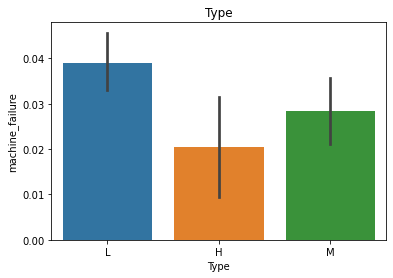

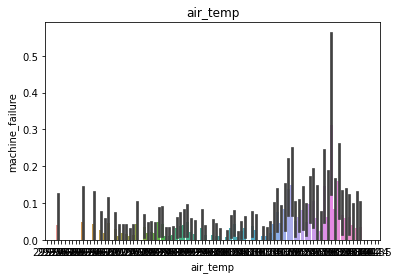

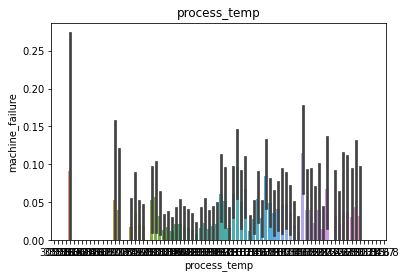

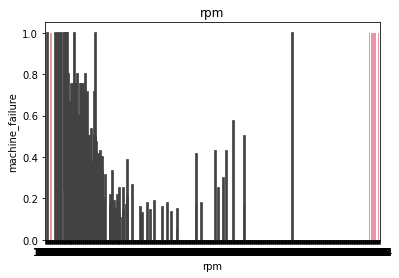

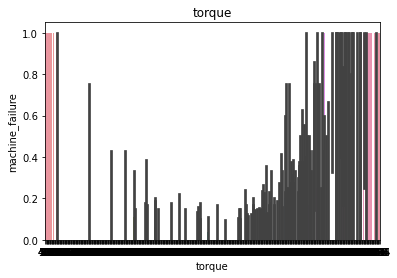

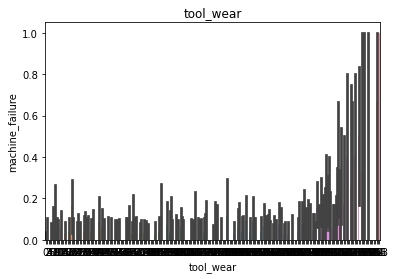

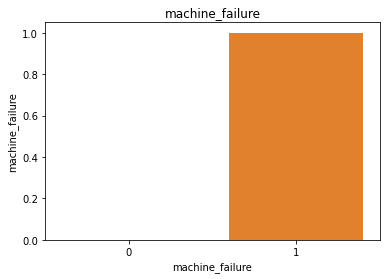

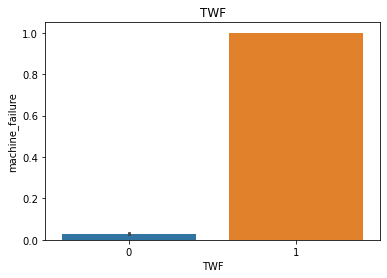

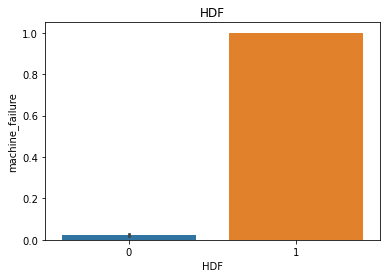

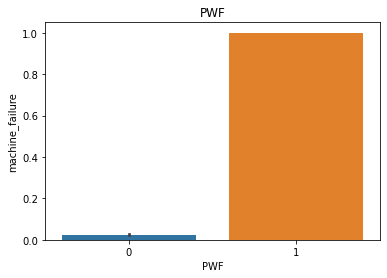

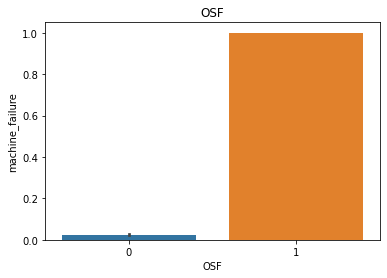

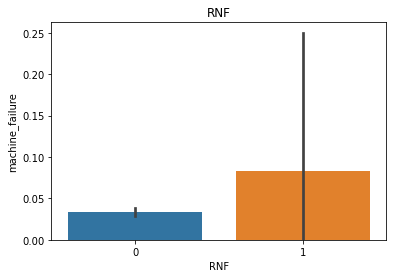

In [17]:
for col in train.columns:
    sns.barplot(data = train, x= train[col], y=train.machine_failure)
    plt.title(col)
    plt.show()

Text(0.5, 1.0, 'rpm vs torque')

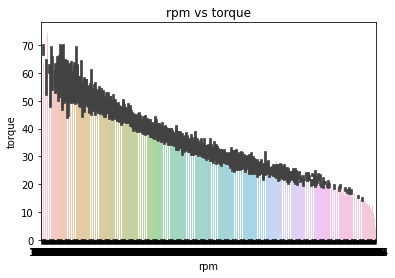

In [17]:
# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('rpm', 'torque', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('rpm')
plt.ylabel('torque')
plt.title('rpm vs torque')

In [18]:
train.columns

Index(['Type', 'air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear',
       'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [19]:
train.RNF.value_counts()

0    6388
1      12
Name: RNF, dtype: int64

In [20]:
for col in train.columns:
    train.groupby(train[col]).value_counts()
 

In [21]:
train.groupby(['Type','machine_failure']).sum()

air_temp  process_temp      rpm    torque  tool_wear  \
Type machine_failure                                                          
H    0                 187041.2      193359.0   958535   24846.0      66827   
     1                   3916.5        4035.5    19068     667.9       1650   
L    0                1104894.1     1141787.8  5682639  145250.3     392644   
     1                  44816.3       46226.3   222168    7509.9      21774   
M    0                 562751.8      581556.3  2882581   74671.9     202976   
     1                  16579.4       17080.2    88752    2483.8       7019   

                      TWF  HDF  PWF  OSF  RNF  
Type machine_failure                           
H    0                  0    0    0    0    1  
     1                  3    5    4    2    0  
L    0                  0    0    0    0    9  
     1                 14   50   38   53    1  
M    0                  0    0    0    0    1  
     1                  9   23   19    5    0

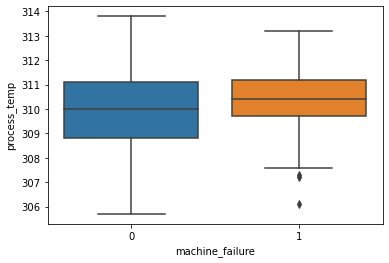

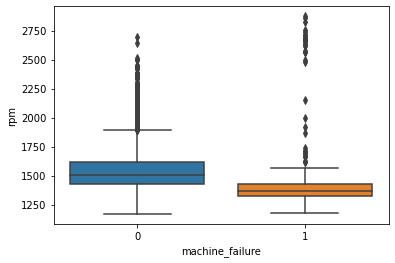

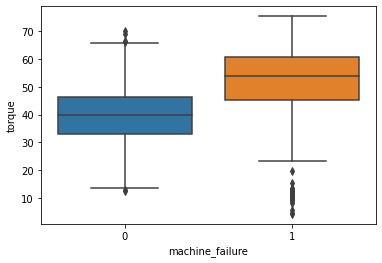

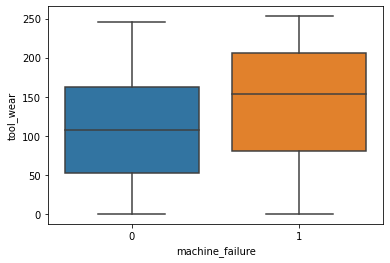

In [22]:
cols = ['process_temp', 'rpm', 'torque', 'tool_wear']
for col in cols:
    sns.boxplot(data= train, y= col, x = 'machine_failure')
    plt.show()

In [23]:
train.columns

Index(['Type', 'air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear',
       'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

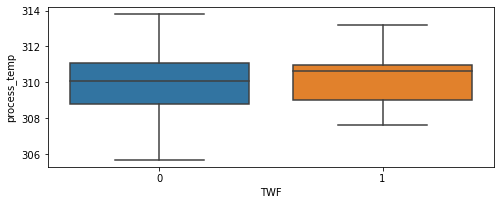

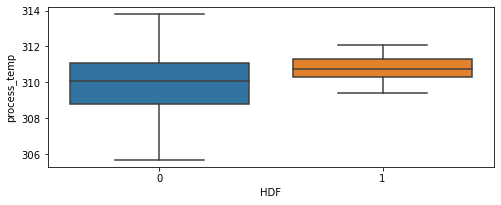

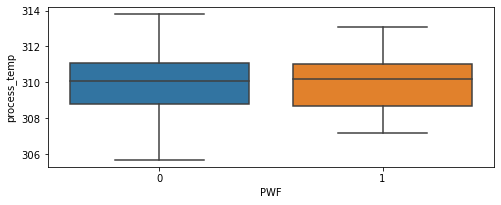

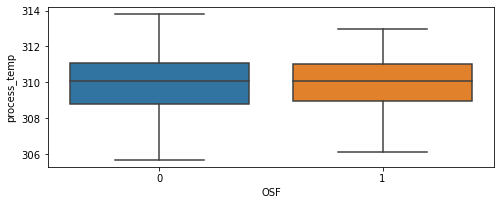

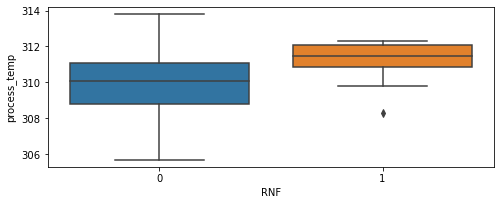

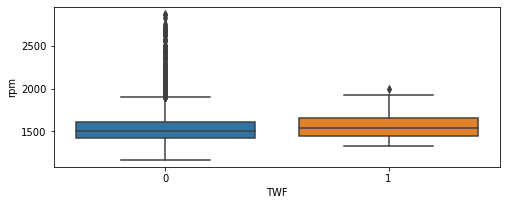

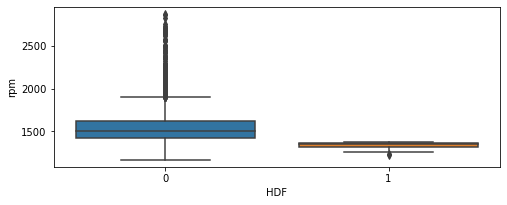

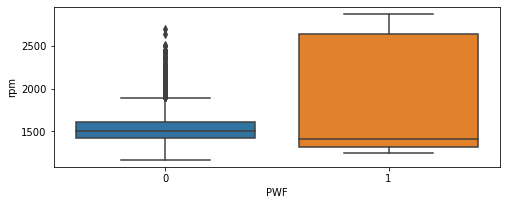

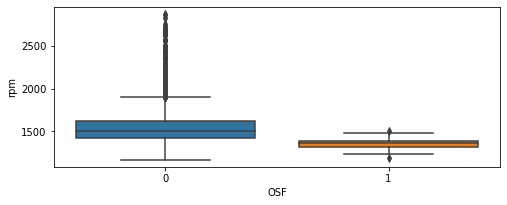

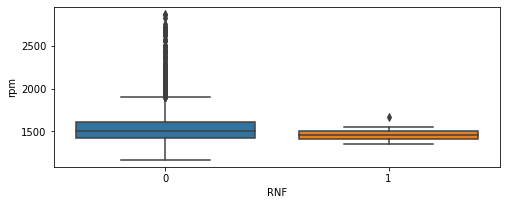

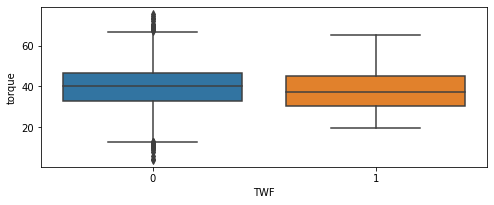

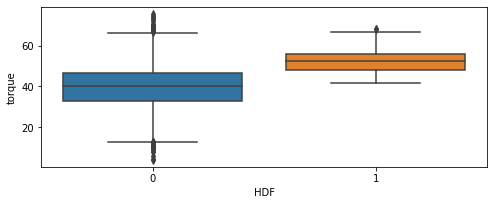

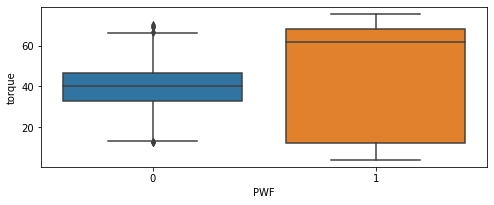

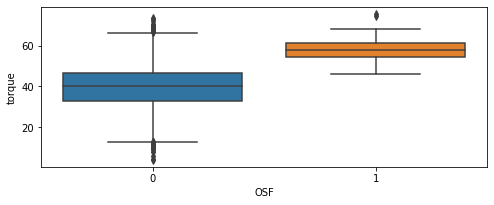

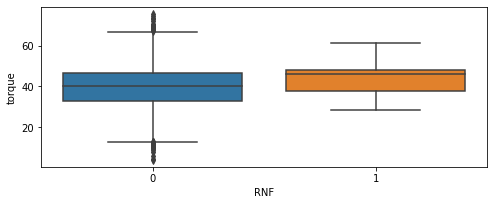

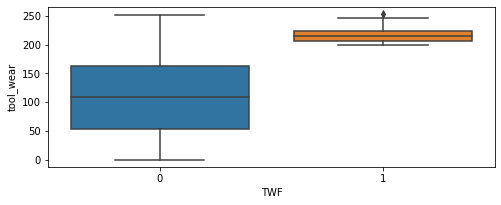

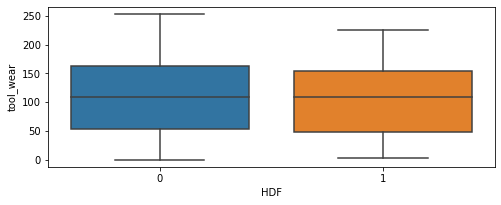

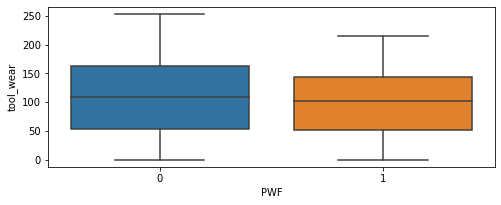

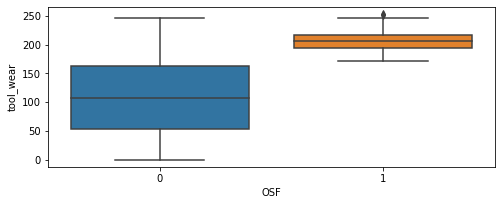

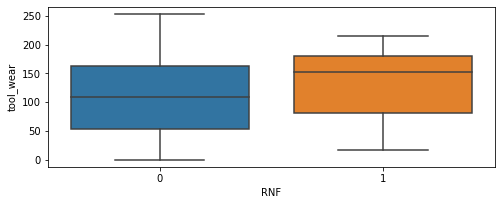

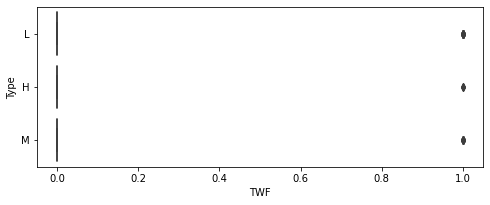

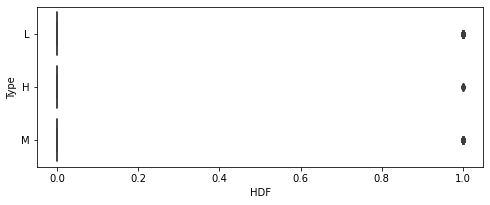

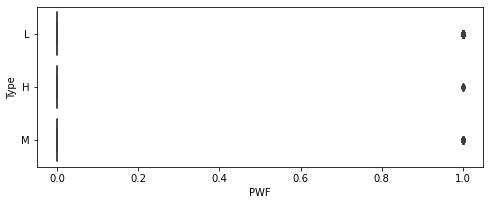

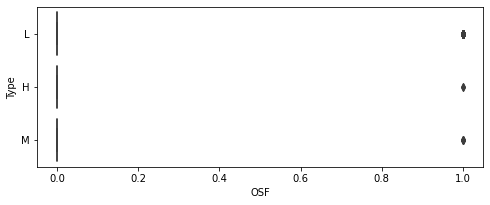

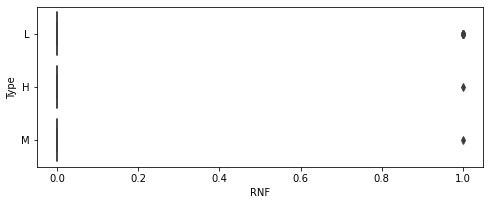

In [24]:
cols = ['process_temp', 'rpm', 'torque', 'tool_wear', 'Type']
fails = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
m=2
for col in cols:
    for fail in fails:
        plt.figure(figsize=(8,10))
        plt.subplot(3,1, m)
        sns.boxplot(data= train, y= col, x = fail)
        plt.show()

<AxesSubplot:>

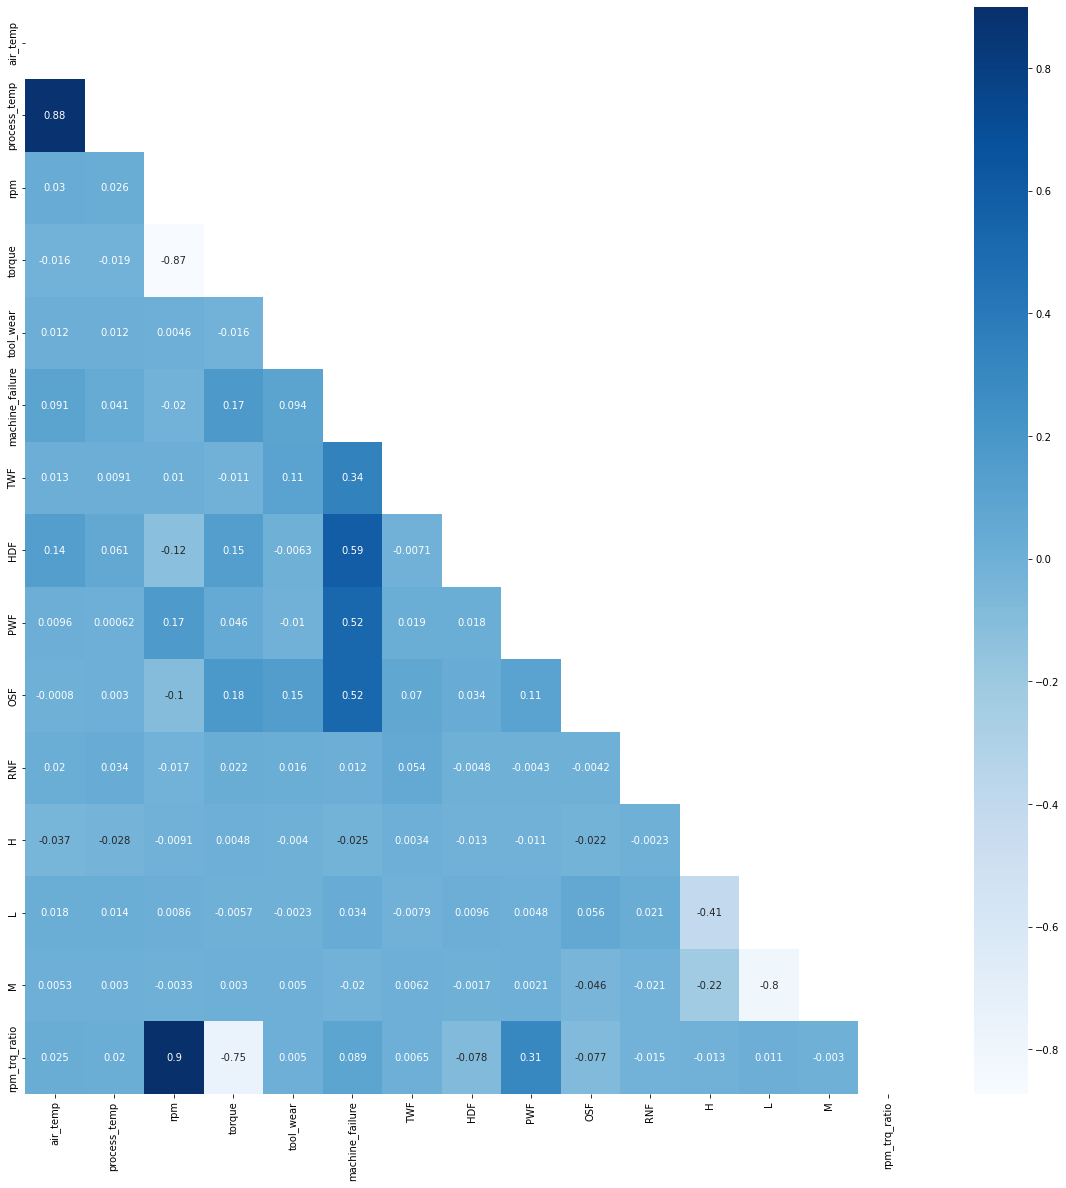

In [28]:
# making a correlation table using spearman becuase data is not normally distributed
correlation_table = train.corr()

# Declaring a size for the heatmap and making heatmap to see the correlations between all variables in the dataset
plt.figure(figsize= (20,20))
sns.heatmap(correlation_table, cmap='Blues', annot = True, mask = np.triu(correlation_table))

In [22]:
train['rpm_trq_ratio'] = train.rpm / train.torque

Text(0.5, 1.0, 'RPM speed bins against failure average')

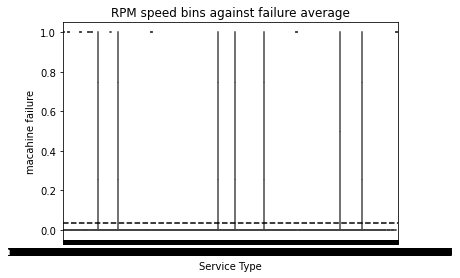

In [26]:
# Plotting out internet service type against churn with overal churn mean as the black line
sns.boxplot('rpm_trq_ratio', 'machine_failure', data=train)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Service Type')
plt.ylabel('macahine failure')
plt.title('RPM speed bins against failure average')

How does rpm affect machine failure rates?

In [25]:
# create a categorical feature
train['rpm_bin'] = pd.qcut(train.rpm, 3, labels=['slow', 'medium', 'fast'])
# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('rpm', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Service Type')
plt.ylabel('Churn Rate')
plt.title('RPM speed bins against failure average')

In [27]:
slow = train[train['rpm_bin'] == 'slow'].machine_failure
jog = train[train['rpm_bin'] == 'medium'].machine_failure
fast = train[train['rpm_bin'] == 'fast'].machine_failure
# Set alpha
alpha = 0.05
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(slow, jog, fast)
if p < alpha:
    print('We reject the null and the variable is statistically significant')
else:
    print('We fail to reject the null and it is not statistically significant')

We reject the null and the variable is statistically significant


Text(0.5, 1.0, 'Torque bins against failure average')

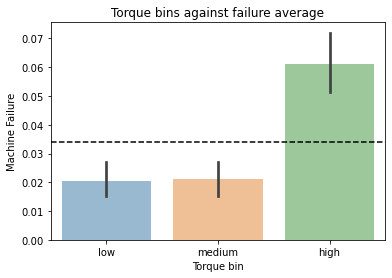

In [28]:
# create a categorical feature
train['torque_bin'] = pd.qcut(train.air_temp, 3, labels=['low', 'medium', 'high'])

# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('torque_bin', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Torque bin')
plt.ylabel('Machine Failure')
plt.title('Torque bins against failure average')

In [29]:
low = train[train['torque_bin'] == 'low'].machine_failure
medium = train[train['torque_bin'] == 'medium'].machine_failure
high = train[train['torque_bin'] == 'high'].machine_failure
# Set alpha
alpha = 0.05
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(low, medium, high)
if p < alpha:
    print('We reject the null and the variable is statistically significant')
else:
    print('We fail to reject the null and it is not statistically significant')

We reject the null and the variable is statistically significant


Text(0.5, 1.0, 'Process temp bins against failure average')

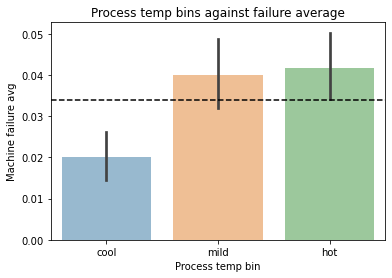

In [30]:
# create a categorical feature
train['process_temp_bin'] = pd.qcut(train.process_temp, 3, labels=['cool', 'mild', 'hot'])

# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('process_temp_bin', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Process temp bin')
plt.ylabel('Machine failure avg')
plt.title('Process temp bins against failure average')

In [31]:
cold = train[train['process_temp_bin'] == 'cool'].machine_failure
warm = train[train['process_temp_bin'] == 'mild'].machine_failure
hotter = train[train['process_temp_bin'] == 'hot'].machine_failure
# Set alpha
alpha = 0.05
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cold, warm, hotter)
if p < alpha:
    print('We reject the null and the variable is statistically significant')
else:
    print('We fail to reject the null and it is not statistically significant')

We reject the null and the variable is statistically significant


Text(0.5, 1.0, 'Tool wear bins against failure average')

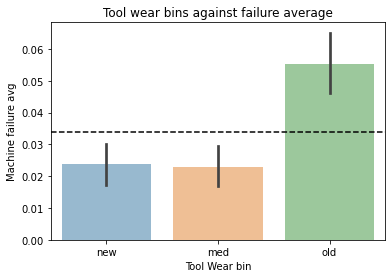

In [32]:
# create a categorical feature
train['tool_wear_bin'] = pd.qcut(train.tool_wear, 3, labels=['new', 'med', 'old'])

# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('tool_wear_bin', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Tool Wear bin')
plt.ylabel('Machine failure avg')
plt.title('Tool wear bins against failure average')

In [33]:
new = train[train['tool_wear_bin'] == 'new'].machine_failure
med = train[train['tool_wear_bin'] == 'med'].machine_failure
old = train[train['tool_wear_bin'] == 'old'].machine_failure
# Set alpha
alpha = 0.05
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(new, med, old)
if p < alpha:
    print('We reject the null and the variable is statistically significant')
else:
    print('We fail to reject the null and it is not statistically significant')

We reject the null and the variable is statistically significant


In [34]:
# # Plotting out internet service type against churn with overal churn mean as the black line
# sns.barplot('air_temp_bin', 'machine_failure', data=train, alpha=.5)
# plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
# plt.xlabel('Air temp bin')
# plt.ylabel('Machine Failure')
# plt.title('Air temp bins against failure average')

ValueError: Could not interpret input 'air_temp_bin'

Text(0.5, 1.0, 'Air temp bins against failure average')

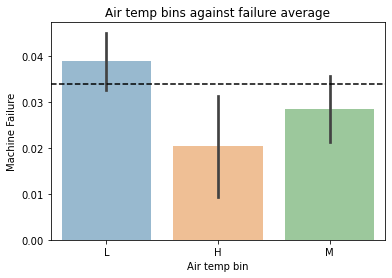

In [ ]:
# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('Type', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Air temp bin')
plt.ylabel('Machine Failure')
plt.title('Air temp bins against failure average')

In [19]:
cool = train[train['air_temp_bin'] == 'cool'].machine_failure
mild = train[train['air_temp_bin'] == 'mild'].machine_failure
hot = train[train['air_temp_bin'] == 'hot'].machine_failure
# Set alpha
alpha = 0.05
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cool, mild, hot)
if p < alpha:
    print('We reject the null and the variable is statistically significant')
else:
    print('We fail to reject the null and it is not statistically significant')

KeyError: 'air_temp_bin'

Text(0.5, 1.0, 'Air temp bins against failure average')

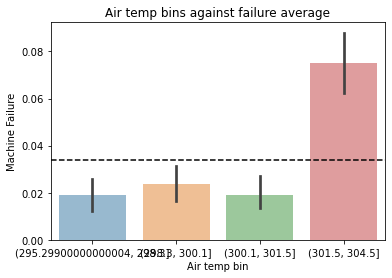

In [ ]:
# create a categorical feature
train['air_bin'] = pd.qcut(train.air_temp, 4)

# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('air_bin', 'machine_failure', data=train, alpha=.5)
plt.axhline(train.machine_failure.mean(), ls = '--', color = 'black')
plt.xlabel('Air temp bin')
plt.ylabel('Machine Failure')
plt.title('Air temp bins against failure average')

In [33]:
train.columns

Index(['air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear',
       'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'rpm_trq_ratio'],
      dtype='object')

In [29]:
def MinMax_scaler(x_train, x_validate, x_test):
 
    scaler = RobustScaler().fit(x_train)

    scaler.fit(x_train)

        #Columns to scale
    cols = ['air_temp', 'process_temp', 'rpm' 'torque', 'tool_wear', 'H', 'L', 'M']
    # Fit numerical features to scaler
    scaler.fit(train[cols])
    # Set the features to transformed value
    train[cols] = scaler.transform(train[cols])
    validate[cols] = scaler.transform(validate[cols])
    test[cols] = scaler.transform(test[cols])
    
    x_train_scaled = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
    x_validate_scaled = pd.DataFrame(scaler.transform(x_validate), index=x_validate.index, columns=x_validate.columns)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns = x_test.columns)
    
    return x_train_scaled, x_validate_scaled, x_test_scaled

In [37]:
x_train_scaled.columns

Index(['Type', 'air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear',
       'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'rpm_bin',
       'torque_bin', 'process_temp_bin', 'tool_wear_bin'],
      dtype='object')

In [20]:
# Splitting the x and y variables for the model for all three subsets
x_train = train.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
x_validate = validate.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
x_test = test.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

y_train = train['machine_failure']
y_validate = validate['machine_failure']
y_test = test['machine_failure']

In [21]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)


In [22]:
x_train.shape

(6400, 8)

In [32]:
#importing my scaler function in order to use the min max scale 
x_train_scaled, x_validate_scaled, x_test_scaled = MinMax_scaler(x_train, x_validate, x_test)

KeyError: "['rpmtorque'] not in index"

In [65]:
x_train_scaled

,air_temp,process_temp,rpm,torque,tool_wear,H,L,M
8630,-0.84375,-0.739130,-0.696335,1.281481,-0.513761,0.0,0.0,0.0
1595,-0.65625,-0.826087,-0.727749,0.948148,1.009174,0.0,0.0,0.0
4464,0.84375,0.217391,0.874346,-0.711111,0.853211,0.0,0.0,0.0
8736,-0.87500,-0.608696,-0.068063,0.007407,0.036697,0.0,0.0,0.0
1411,-0.37500,0.000000,2.303665,-1.237037,0.770642,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3955,0.68750,0.608696,-0.293194,0.703704,-0.733945,0.0,0.0,0.0
8205,-0.21875,0.347826,-0.303665,0.533333,-0.880734,0.0,-1.0,1.0
7121,0.25000,0.130435,-0.675393,0.340741,-0.192661,0.0,-1.0,1.0
3551,0.56250,0.347826,1.544503,-1.177778,-0.495413,0.0,0.0,0.0


In [23]:
def select_rfe(x, y, k):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select= k)
    rfe.fit(x, y)
    return x.columns[rfe.get_support()]

select_rfe(x_train, y_train, 6)

Index(['air_temp', 'process_temp', 'torque', 'H', 'L', 'M'], dtype='object')

In [24]:
predictions = pd.DataFrame({
    'actual': validate.machine_failure
}) 

In [68]:
# Setting up and fitting the data for linear regression using my sqrt data for normalization
liner = LinearRegression()

liner.fit(x_train_scaled, y_train)

predictions['simple_lm'] = liner.predict(x_validate_scaled)

In [72]:
# Setting up and fitting the lars to my normalized data

lars = LassoLars(alpha=2.0)

lars.fit(x_train_scaled, y_train)


predictions['Lasso_Lars'] = lars.predict(x_validate_scaled)

In [69]:
# Setting up and fitting the TweedieRegressor to the non-normalized data
tweedie_reg = TweedieRegressor(power=0, alpha=1)

tweedie_reg.fit(x_train_scaled, y_train)


predictions['tweedie'] = tweedie_reg.predict(x_validate_scaled)

In [70]:
predictions['baseline'] = train.machine_failure.mean()
predictions.head()

,actual,simple_lm,tweedie,baseline
2229,0,0.039486,0.028653,0.033906
4885,0,0.000093,0.032294,0.033906
8444,0,-0.052642,0.008638,0.033906
7595,0,-0.042388,0.030515,0.033906
9959,0,0.073340,0.039629,0.033906


In [73]:
def calculate_rmse2(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted, squared=False)

predictions.apply(calculate_rmse2).sort_values()

actual        0.000000
simple_lm     0.168987
tweedie       0.177378
baseline      0.180585
Lasso_Lars    0.180585
dtype: float64

In [30]:
1 - 0.169

0.831

In [29]:
baseline = 1 - train.machine_failure.mean()
baseline

0.96609375

In [25]:
# Making the model for Random Forest using the max depth found in exploration loop and setting other hyperparameters
rft = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=10, n_estimators=100, max_depth=5,max_features='sqrt', random_state=123)

# Fitting the model to the train data section
rft.fit(x_train, y_train)


# Using the score function to print the model's preformance on the train set
print('Accuracy of random forest classifier on training set: {:.2%}'
     .format(rft.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 97.33%


In [27]:
# Using the score function to print the model's preformance on the validate set
print('Accuracy of random forest classifier on validate set: {:.2%}'
     .format(rft.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 97.00%


In [28]:
# Create KNN Object
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# Fit object to training data
knn.fit(x_train_scaled, y_train)

# Make predictions on training data
y_pred = knn.predict(x_train_scaled)

# Using the score function to print the model's preformance on the training set
print('Accuracy of KNN classifier on training set: {:.2%}'
     .format(knn.score(x_train_scaled, y_train)))

NameError: name 'x_train_scaled' is not defined

In [77]:
# Using the score function to print the model's preformance on the training set
print('Accuracy of KNN classifier on training set: {:.2%}'
     .format(knn.score(x_validate_scaled, y_validate)))

Accuracy of KNN classifier on training set: 97.62%


In [78]:
# Using the score function to print the model's preformance on the validate set
print('Accuracy of random forest classifier on validate set: {:.2%}'
     .format(knn.score(x_validate_scaled, y_validate)))

Accuracy of random forest classifier on validate set: 97.62%


In [79]:
# Using my exploration file I chose the best level of c for the model to use here. 
logit1 = LogisticRegression(random_state=123, class_weight="auto", C=1)

# Fitting the model to the train dataset
logit1.fit(x_train_scaled, y_train)


# Using the score function to print the model's preformance on the train set
print("Model trained on selected features")
print('Accuracy of Logistic Regression classifier on training set: {:.2%}'
     .format(logit1.score(x_validate_scaled, y_validate)))

Model trained on selected features
Accuracy of Logistic Regression classifier on training set: 97.06%


In [83]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 10).fit(x_train_scaled, y_train)
svm_predictions = svm_model_linear.predict(x_validate_scaled)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(x_validate_scaled, y_validate)
  
# creating a confusion matrix
cm = confusion_matrix(y_validate, svm_predictions)

accuracy


0.96625

In [84]:
total_df = proj_acquire.prep_maint(df)

In [85]:
total_df.shape

total_df.head()

,air_temp,process_temp,rpm,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [86]:
train2, validate2, test2 = proj_acquire.split_maint(total_df)

In [87]:
train2.head()

,air_temp,process_temp,rpm,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
8630,297.4,308.4,1371,57.4,52,0,0,0,0,0,0,0,1,0
1595,298.0,308.2,1365,52.9,218,1,0,0,0,1,0,0,1,0
4464,302.8,310.6,1671,30.5,201,0,0,0,0,0,0,0,1,0
8736,297.3,308.7,1491,40.2,112,0,0,0,0,0,0,0,1,0
1411,298.9,310.1,1944,23.4,192,0,0,0,0,0,0,0,1,0


In [88]:


x_train2 = train2.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
x_validate2 = validate2.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
x_test2 = test2.drop(columns = ['machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])



In [89]:
x_train2.columns

Index(['air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear', 'H', 'L',
       'M'],
      dtype='object')

In [90]:
y_train2 = train2[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
y_validate2 = validate2[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
y_test2 = test2[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]


# #importing my scaler function in order to use the min max scale 
# x_train_scaled2, x_validate_scaled2, x_test_scaled2 = MinMax_scaler(x_train2, x_validate2, x_test2)



In [91]:
x_train2.head()

,air_temp,process_temp,rpm,torque,tool_wear,H,L,M
8630,297.4,308.4,1371,57.4,52,0,1,0
1595,298.0,308.2,1365,52.9,218,0,1,0
4464,302.8,310.6,1671,30.5,201,0,1,0
8736,297.3,308.7,1491,40.2,112,0,1,0
1411,298.9,310.1,1944,23.4,192,0,1,0


In [51]:
# total_df = total_df.drop(columns=['air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear'])

In [54]:
# # Seperating the data to use only the features used by my best model without dropping irrelevent columns
predict_maint = total_df[['air_temp', 'process_temp', 'rpm', 'torque', 'tool_wear', 'H', 'L', 'M']]


predict_maint.head()


,air_temp,process_temp,rpm,torque,tool_wear,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0


In [58]:
total_df.columns

Index(['Type', 'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')

In [59]:

# #Doing the same as above except for just the prediction if a customer will churn where churn = 1 and no churn = 0
total_df['prediction'] = knn.predict(predict_maint)

In [60]:
total_df.prediction.value_counts()

0    9839
1     161
Name: prediction, dtype: int64